In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [4]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [7]:
gold_data.head()    #Printing the first five values of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()  #Printing the last five values of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
gold_data.shape  #Printing the number of rows and columns

(2290, 6)

In [13]:
gold_data.info()    #Getting some basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
gold_data.isnull().sum()    #Getting the null values

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [20]:
gold_data.describe()    #Getting metadata about the dataset

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


There are two types of correlations:
1 Positive correlation
2 Negative correlation

In [22]:
correlation = gold_data.drop(columns=['Date']).corr()


<Axes: >

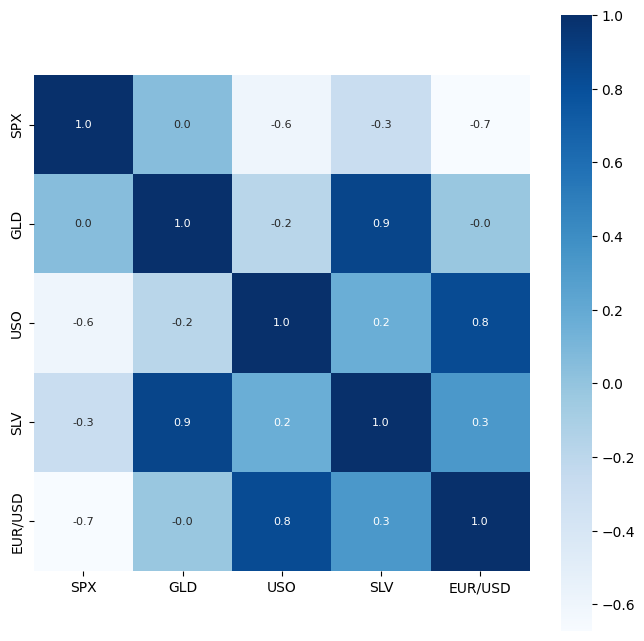

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [26]:
#correlation values for gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-826139974.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

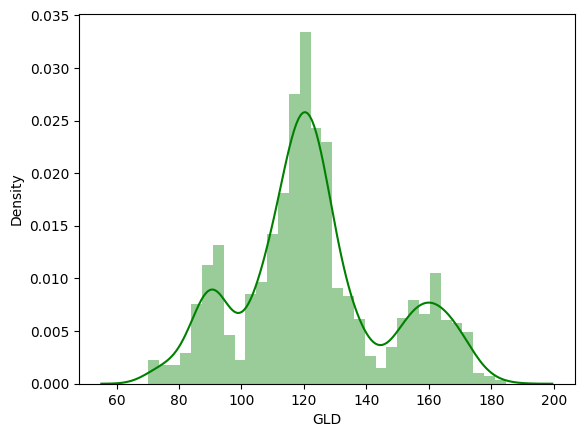

In [28]:
#Checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

Spliting the features and target

In [29]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [31]:
x   #it doesn't contain the GLD and Date column

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [32]:
y   #it contains only gold prices

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


Spliting into training and test data

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model training: Random Forest Regressor

In [34]:
regressor=RandomForestRegressor(n_estimators=100)

In [35]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation:

In [36]:
#Prediction on test data
test_data_prediction=regressor.predict(x_test)
print(test_data_prediction)

[168.71979968  82.24619965 116.06870023 127.46790069 120.76650107
 154.78249766 150.71369913 126.17970031 117.46099865 126.00570057
 116.55670097 171.39410123 141.42009817 167.72439918 115.11680025
 117.39760035 138.85390321 170.19320122 160.18650263 161.07069925
 155.1368     125.32509989 175.28770002 156.65170293 125.14930042
  93.77239975  77.06150026 120.4837004  119.14009951 167.40929962
  88.18590059 125.17909994  91.10480099 117.74330023 121.129999
 136.2520011  115.23810152 115.23410069 146.6197998  107.32580093
 104.05310251  87.15339791 126.47280029 118.03220042 152.63339906
 119.6139999  108.36189993 108.10839871  93.2857007  127.17189771
  74.95250036 113.75579929 121.31950031 111.36639914 118.73359871
 121.27879927 159.28370046 169.47340118 146.71359693  85.72359859
  94.29860015  86.87949859  90.49250011 118.93780105 126.41190099
 127.5433003  169.8172996  122.14839909 117.42729906  98.49730032
 168.41480063 143.07039833 132.48970186 121.0308024  120.8277994
 119.70270084

In [37]:
#Comparing the predicted values from actual values

#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error: ",error_score)


R squared error:  0.9893396909851474


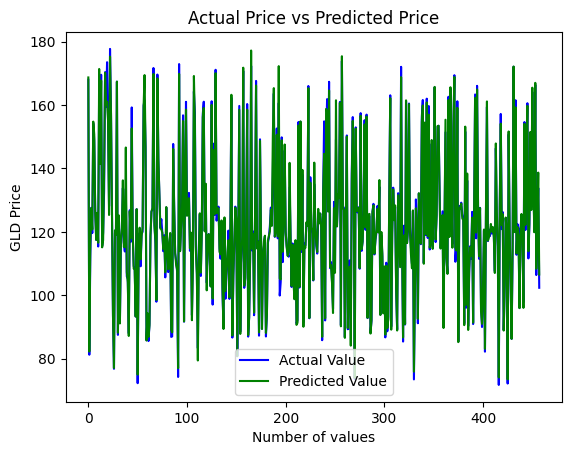

In [38]:
#Ploting the comparison
y_test=list(y_test)
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()